In [3]:
# import all important libraries for analysis and modelling

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

In [4]:
# Load the dataset
df = pd.read_csv("/content/Bank_Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Check the dimension of the dataset
df.shape

(10000, 14)

Total number of records/rows present in the dataset is: **10000**

Total number of attributes/columns present in the dataset is: **14**

In [6]:
# Lets get the attributes in the dataset and understand each column
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**Let's understand Column definitions**

**RowNumber**: A unique identifier for eac\h record.

**CustomerId**: ID to track and differentiate individual customers within the dataset.

**Surname**: Family name of each customer.

**CreditScore**: Numerical value that assesses the creditworthiness of customer based on their credit history.

**Geography**: Customer's geographic distribution.

**Gender**: Customers gender data as either male or female.

**Age**: Customer's age in years and can be used to analyze age-related patterns and behaviors.

**Tenure**: The number of years or months the customer has been associated with the bank.

**Balance**: The amount of money in the customer's bank account.

**NumOfProducts**: This column include various products such as savings accounts, loans, credit cards, etc.

**HasCrCard**: This column has binary variable with a value of 1 if the customer possesses a credit card and 0 otherwise.

**IsActiveMember**: It repressnts binary variable indicating whether the customer is an active member (1) or not (0) with the bank.

**EstimatedSalary**: Customer's salary data, which can be relevant for analyzing churn behavior.

**Exited**: Whether a customer has churned (1) or not (0) from the bank. It is the variable we aim to predict using the other features.



In [7]:
# Now lets understand the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# Get missing values in the data
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**Analysis**

No column has missing values, so "Data Imputation" is not required.

If our dataset has missing values, we need to handle them carefully as it can negatively impact the performance of our machine learning model.

we can use the following steps,

1) Understand the context of the data missing.

2) Missing data is completely random and has no relation with other data.

3) Missing data is related to observed data.

4) Related to missing value itself.

After analysing this, we can do following actions for Numerical and Categorical columns.

Numerical columns

- Drop rows or columns with too many missing values if they are not critical.
- Replace missing values with the mean, median, or mode

Categorical columns

- We can use Mode value,replace missing values with the most frequent category.
- Assign missing values a new category, e.g."Unknown"






In [9]:
#Check duplicate rows
df.duplicated().sum()

0

**Analysis**

Since there no duplicate data, we can say no "Data Leakage" in our dataset.

If there are any duplicates in the data, we need to remove them to prevent leakage.

In [10]:
# Analyse categorical columns
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


After analysing categorical data, we can say

**Surname** column has high unique values, and not relevant for predicting customer churned or not, so we can simply drop this feature.

**Geography & Gender** columns have low unique values and are relevant for predicting customer churned or not.

# Let's begin the ETL proces

a.	Data cleaning.

b.	Handling missing values.

c.	Handling inconsistency in the data.

In [11]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4135,4136,15789874,Wang,712,France,Female,29,3,87375.78,2,0,0,166194.53,0
7274,7275,15680901,Potter,652,France,Female,34,6,97435.85,2,1,1,104331.76,0
4207,4208,15732774,Marchesi,656,France,Male,37,7,112291.34,1,1,0,153157.97,0
7511,7512,15686913,Kung,757,France,Male,38,0,0.00,1,1,0,83263.06,0
2067,2068,15767794,Browne,744,France,Male,31,9,120718.28,1,1,1,58961.49,0
4019,4020,15592091,Belbin,620,Spain,Male,31,2,166833.86,2,1,1,135171.60,0
2361,2362,15635776,Trevisani,686,Germany,Female,43,5,154846.24,2,1,1,151903.60,0
2493,2494,15715920,De Bernales,782,Spain,Male,23,10,98052.66,1,1,1,142587.32,0
3034,3035,15668504,Lucchesi,770,France,Male,36,2,89800.14,1,1,1,105922.69,0
7456,7457,15598614,Lucchesi,790,Spain,Male,20,8,0.00,2,1,0,168152.76,0


Analysis for data cleaning

**RowNumber** and **CustomerId** columns represent unique values and are not relevant for predicting customer churned or not.

**Surname** column has high unique values and also not relevant for prediction.

So we will drop this columns from our dataset.





In [12]:
# Dropping insignificant columns
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
#Rename target column Exited

df.rename(columns={"Exited": "Churned"}, inplace=True)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)
df.head()

<ipython-input-14-14c20fb6eed6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Churned"].replace({0:"No",1:"Yes"},inplace=True)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


We have now completed the **ETL** process and converted raw data into structured data.

So we can perform **Expolatory Data Analysis** and **derive insights from the data.**

Text(0.5, 1.0, 'Churned data')

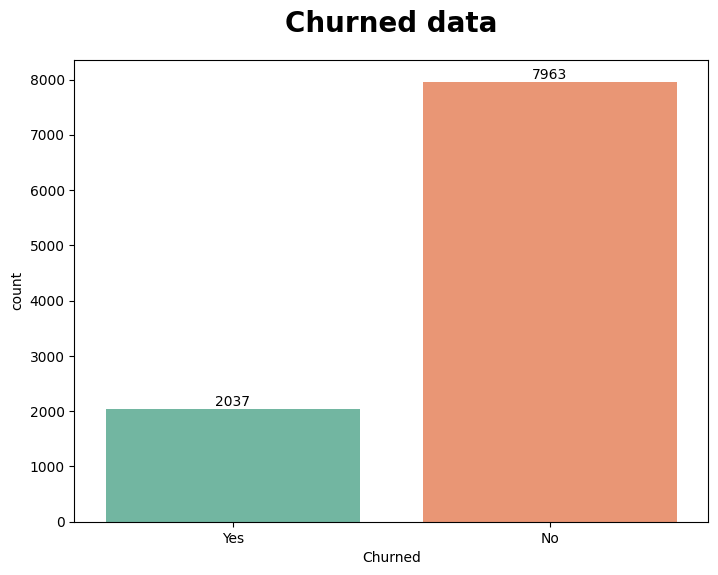

In [15]:
# Visualize target variable "Churned"

count = df["Churned"].value_counts()

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
xy = sns.countplot(x = "Churned", data = df, hue="Churned", palette="Set2")
for label in xy.containers:
    xy.bar_label(label)
plt.title("Churned data",fontweight="black",size=20,pad=20)

**Analysis**

There is a huge class imbalance in churned data column which can lead to bias, so to overcome bias we will use over sampling techniques like **"Random Sampling"** or "**SMOTE**"

if we use random sampling technique ratio of data imbalance is 80:20 which may lead to overfitting.

on the other hand SMOTE will generate synthetic "Churn" records by interpolating between actual churn customer data points which reduce overfitting.

So we will go for SMOTE oversampling method.

In [16]:
# Visualising by Gender

def countplot(column):
    plt.figure(figsize=(12,6))
    xy = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for label in xy.containers:
      xy.bar_label(label)
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

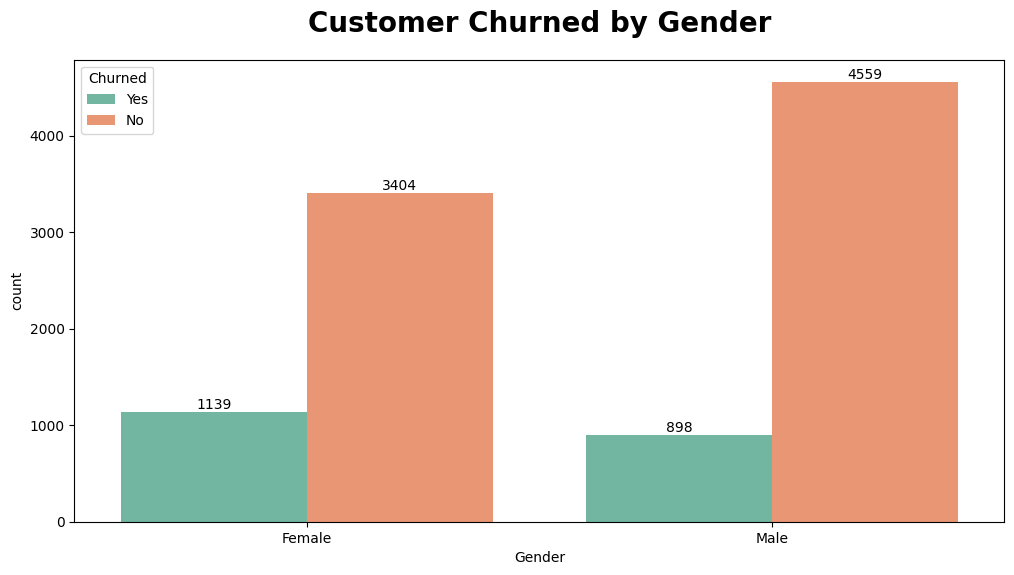

In [17]:
countplot("Gender")

**Analysis**

1) Churned probability is more in females than males.

2) Banks can design targeted marketing campaigns and improve customer experience for females.

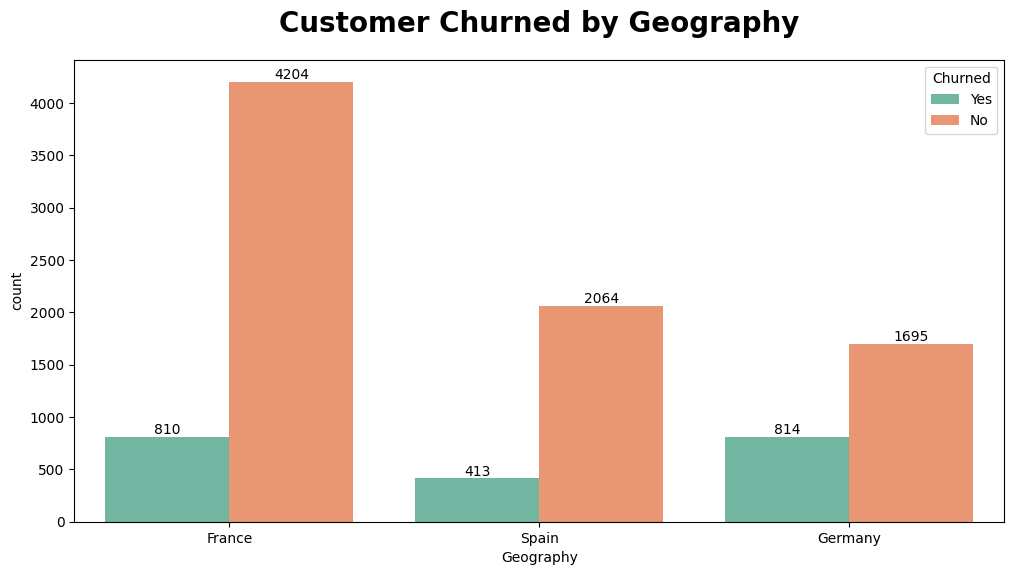

In [18]:
countplot("Geography")

**Analysis**


1) Approx half of the customers are from france.

2) Despite huge total customer difference in France and Germany, Churn rate is same.

3) Almost equal customers in Spain and Germany but Churn rate is double in Germany.


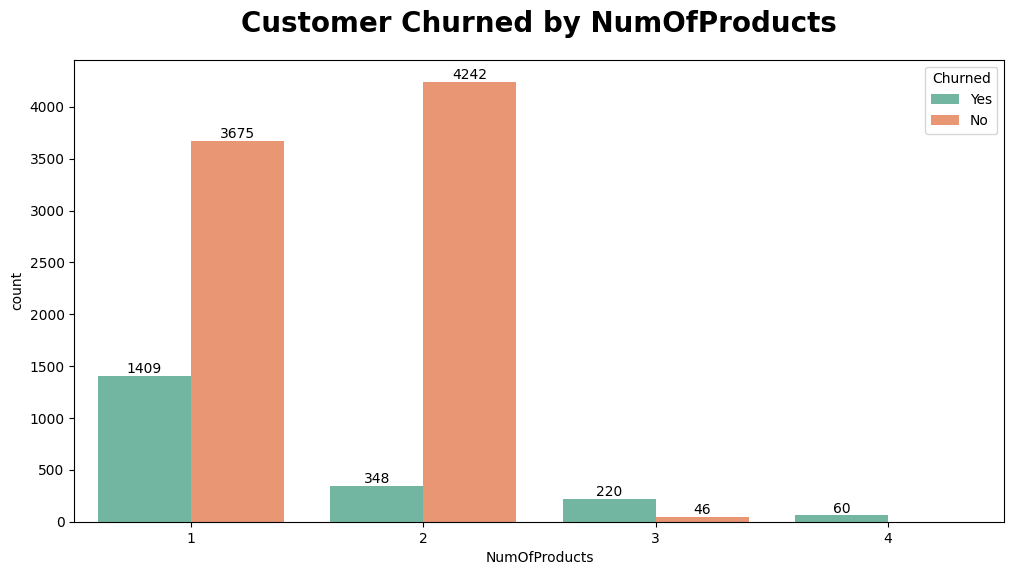

In [19]:
countplot("NumOfProducts")

**Analysis**

Very few customers have more than 2 products, we can do feature engineering by grouping the customers having products more than 2 together to reduce the class imbalance.



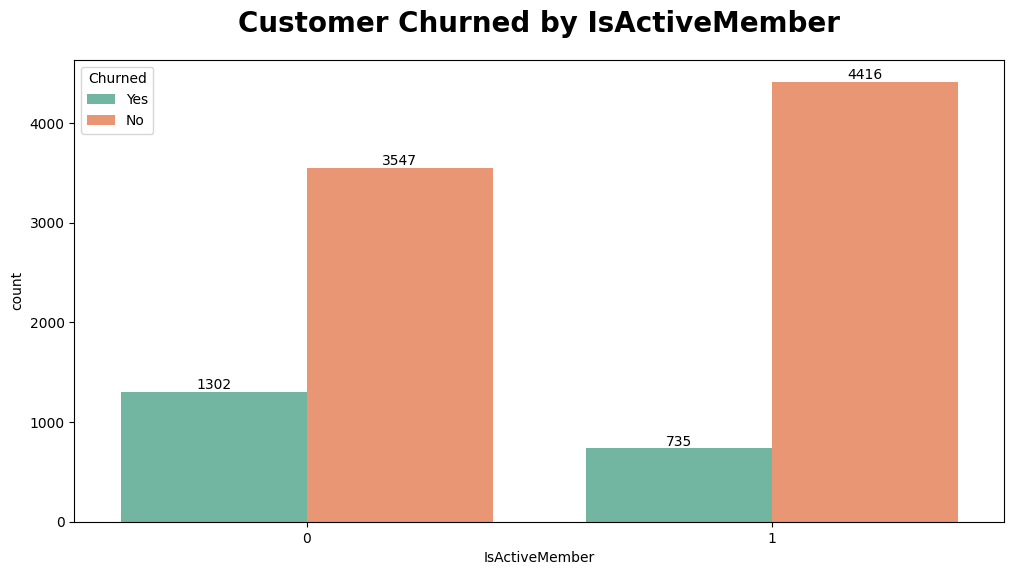

In [20]:
countplot("IsActiveMember")

**Anaysis**

1) Churn rate in non active members is almost double than active members.

2) Customers which are not active are morely likely to deactivate their banking facilities.

3) Banks can provide regular communication and updates, and enhanced digital services so that customers remain active to the banking facilities.

In [25]:
def continous_plot(column):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Churned",data=df,kde=True,palette="Set2")
    plt.title(f"Data of {column} by Churn Status",fontweight="black",pad=20,size=15)

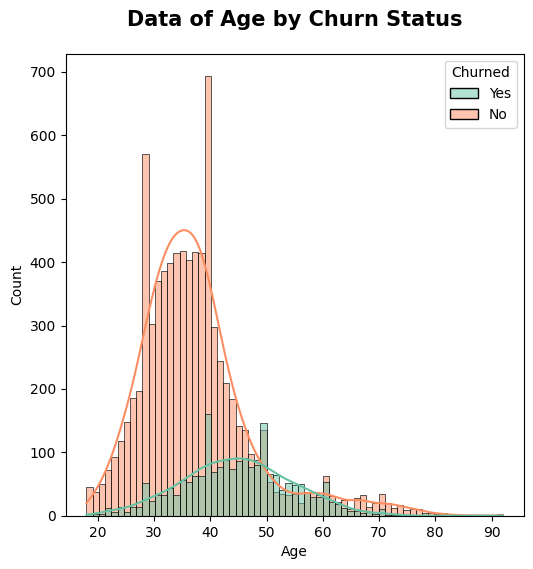

In [26]:
# Visualize churned by Age

continous_plot("Age")

**Analysis**

1) From the graph we clearly see that there are some outliers, distributing the data skewed towards right.It might lead to overfitting.

2) To make it normal distribution, we can use log normal transformation.


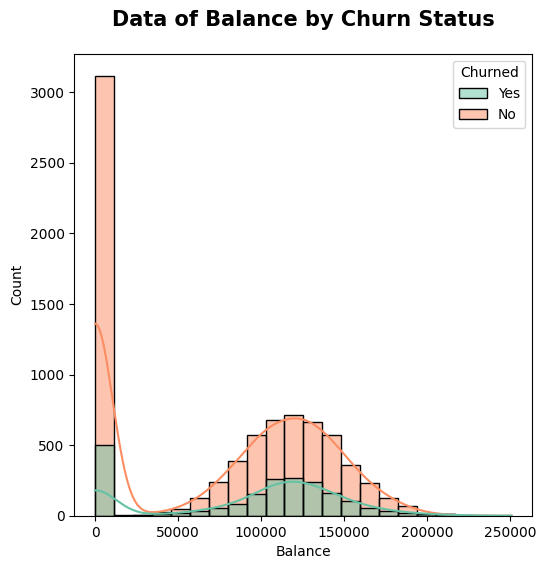

In [27]:
# Visualize churned by Balance

continous_plot("Balance")

**Analysis**

1) We clearly see that more than 3000 customers have account balance equal to zero, which might lead to deactivation of accounts.

2) Using Feature engineering, we can group customers with zero account balance.

So we have now analysed all the variables in the dataset, we can now start the feature engineering process.

In [28]:
# Feature Engineering Process

# Creating new features from "NumOfProducts"

con = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]

val = ["One product","Two Products","More Than 2 Products"]

In [29]:
df["Total_Products"] = np.select(con,val)

In [30]:
df.drop(columns=["NumOfProducts"],inplace=True)

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Total_Products
0,619,France,Female,42,2,0.00,1,1,101348.88,Yes,One product
1,608,Spain,Female,41,1,83807.86,0,1,112542.58,No,One product
2,502,France,Female,42,8,159660.80,1,0,113931.57,Yes,More Than 2 Products
3,699,France,Female,39,1,0.00,0,0,93826.63,No,Two Products
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,No,One product


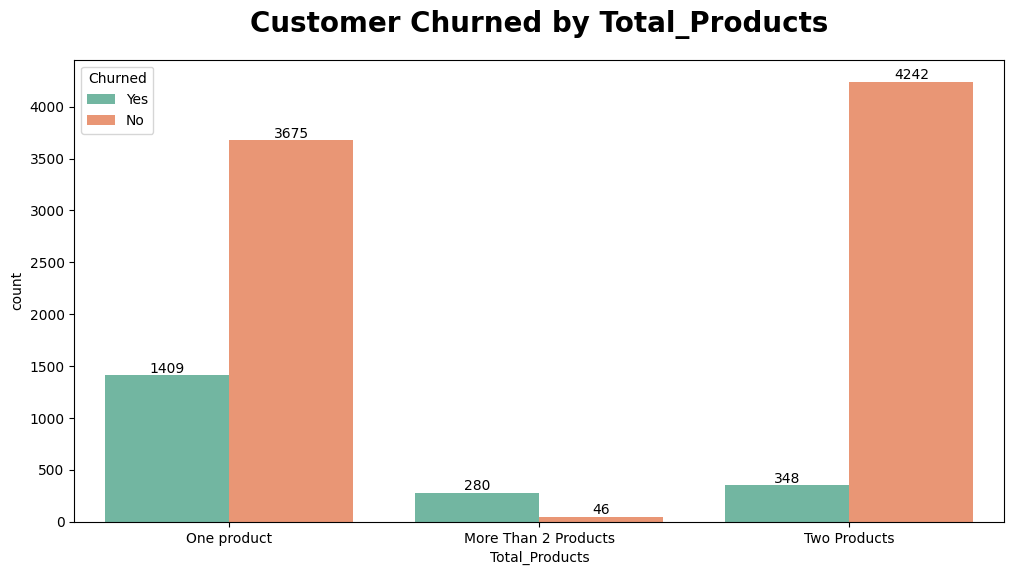

In [32]:
countplot("Total_Products")

In [33]:
# Create new feature for Balance column

con = [(df["Balance"]==0), (df["Balance"]>0)]

val = ["Zero Balance","More Than zero Balance"]

df["Account_Balance"] = np.select(con,val)

df.drop(columns=["Balance"],inplace=True)

df.head()


,CreditScore,Geography,Gender,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Total_Products,Account_Balance
0,619,France,Female,42,2,1,1,101348.88,Yes,One product,Zero Balance
1,608,Spain,Female,41,1,0,1,112542.58,No,One product,More Than zero Balance
2,502,France,Female,42,8,1,0,113931.57,Yes,More Than 2 Products,More Than zero Balance
3,699,France,Female,39,1,0,0,93826.63,No,Two Products,Zero Balance
4,850,Spain,Female,43,2,1,1,79084.10,No,One product,More Than zero Balance


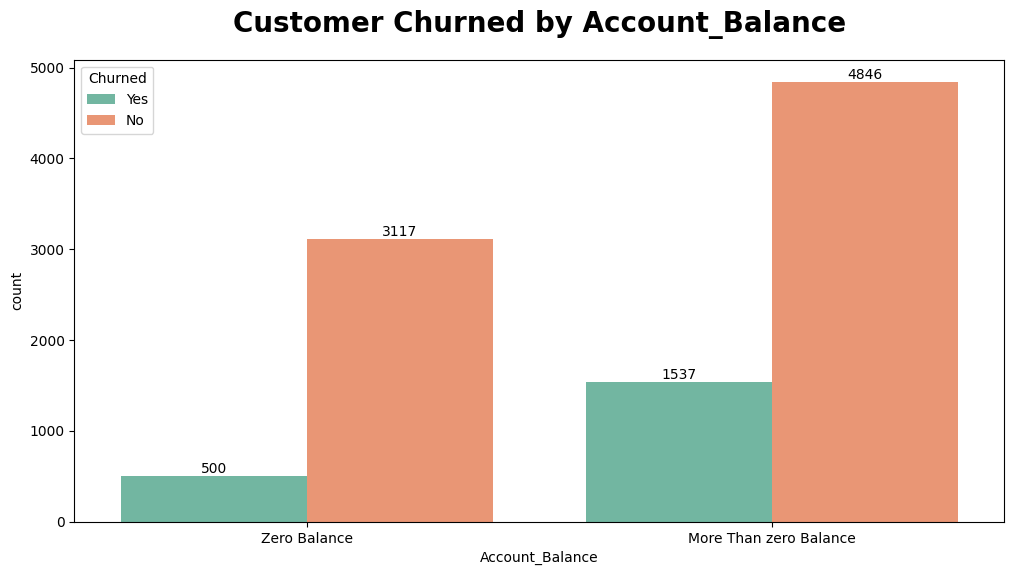

In [34]:
countplot("Account_Balance")

# Data Preprocessing

In [39]:
# We wil find the unique values of Categorical columns

categorical_columns = ["Geography","Gender","Total_Products","Account_Balance"]

for columns in categorical_columns:
  print(f"{columns} has {df[columns].unique()} as unique values")

Geography has ['France' 'Spain' 'Germany'] as unique values
Gender has ['Female' 'Male'] as unique values
Total_Products has ['One product' 'More Than 2 Products' 'Two Products'] as unique values
Account_Balance has ['Zero Balance' 'More Than zero Balance'] as unique values


In [40]:
# As all the categories are independent we will apply One Hot Coding for categorical values

df = pd.get_dummies(columns=categorical_columns, data=df)

In [41]:
df["Churned"].replace({"No":0,"Yes":1},inplace=True)

<ipython-input-41-2f264aa4c0e3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Churned"].replace({"No":0,"Yes":1},inplace=True)
<ipython-input-41-2f264aa4c0e3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churned"].replace({"No":0,"Yes":1},inplace=True)


In [42]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,1,True,False,False,True,False,False,True,False,False,True
1,608,41,1,0,1,112542.58,0,False,False,True,True,False,False,True,False,True,False
2,502,42,8,1,0,113931.57,1,True,False,False,True,False,True,False,False,True,False
3,699,39,1,0,0,93826.63,0,True,False,False,True,False,False,False,True,False,True
4,850,43,2,1,1,79084.10,0,False,False,True,True,False,False,True,False,True,False


In [43]:
# As per EDA we will perform Log transformation on Age column

age_st = df["Age"]

df["Age"] = np.log(df["Age"])


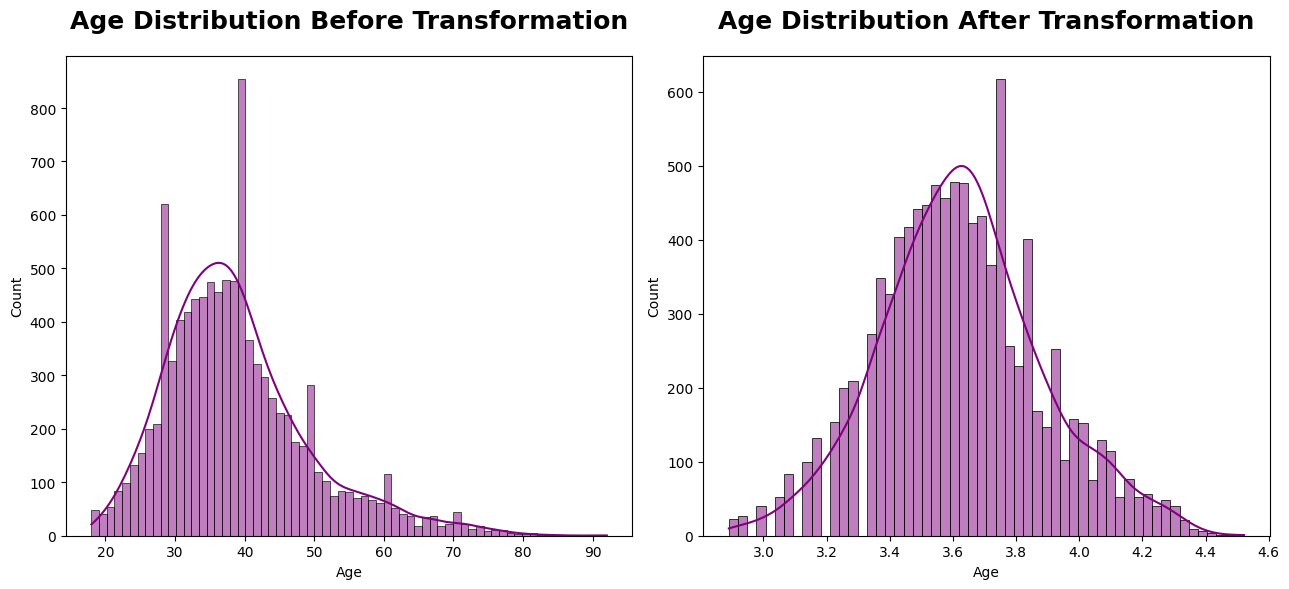

In [44]:
# Lets now visualize before and after transformation

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(age_st, color="purple", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="purple", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

We clearly see that **Age** column has acheived **normal distribution**, which will help machine learning model to find relevant patterns to build accurate model.

In [45]:
# For Model training we need to segregate Features and Labels

X = df.drop(columns=["Churned"])
y = df["Churned"]

In [46]:
# We will split the data into Training and Testing data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [47]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 16)
Shape of x_test is:  (2000, 16)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


**Analysis**

For model training and testing data is equally splitted, now we can build a **Predictive Model** to find key factors that influence customers to churn.


In [48]:
# Now we handle class imbalance for Churned column by SMOTE oversampling technique

st = SMOTE(random_state=42)

x_train_sm, y_train_sm = st.fit_resample(x_train, y_train)

In [49]:
print("Shape of x_train_sm is:",x_train_sm.shape)
print("Shape of y_train_sm is:",y_train_sm.shape)

Shape of x_train_sm is: (12736, 16)
Shape of y_train_sm is: (12736,)


In [50]:
y_train_sm.value_counts().to_frame()

,count
Churned,
0,6368
1,6368


**Analysis**

Both the categories in Target variable are now having equal number of records. Now we can train the Model with balanced records for both churn categories and make a predictive model with low bias.

# Model creation with Random Forest

In [51]:
rf = RandomForestClassifier(random_state=42)

In [52]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required to be at a leaf node
    'bootstrap': [True, False],             # Whether to use bootstrap samples
    'criterion': ['gini', 'entropy']        # Criterion for splitting
}

**Effect on Model:**

**Gini**: Measures the impurity of a node. Faster computation.

**Entropy**: Uses information gain. Slightly more computationally intensive.

In [53]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train_sm, y_train_sm)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [54]:
best_parameters = grid_search.best_params_

best_parameters

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

Lets build Random Forest model with best parameters.

In [55]:
rf = RandomForestClassifier(**best_parameters)

rf.fit(x_train_sm, y_train_sm)


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=10,
                       n_estimators=50)

In [56]:
# Finding the model Accuracy

y_train_pred = rf.predict(x_train_sm)
y_test_pred = rf.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_sm,y_train_pred)*100,2),"%")

print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")


Accuracy Score of Model on Training Data is => 95.39 %
Accuracy Score of Model on Testing Data  is => 84.75 %


In [57]:
# Now lets evaluate model with different matrices

print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))

print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))

print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))


F1 Score of the Model is => 0.8475
Recall Score of the Model is => 0.8475
Precision Score of the Model is => 0.8475


# Explore importance of features Random Forest Model

In [58]:
imp_features = pd.DataFrame({"Feature Name":x_train.columns,
                            "Importance":rf.feature_importances_})


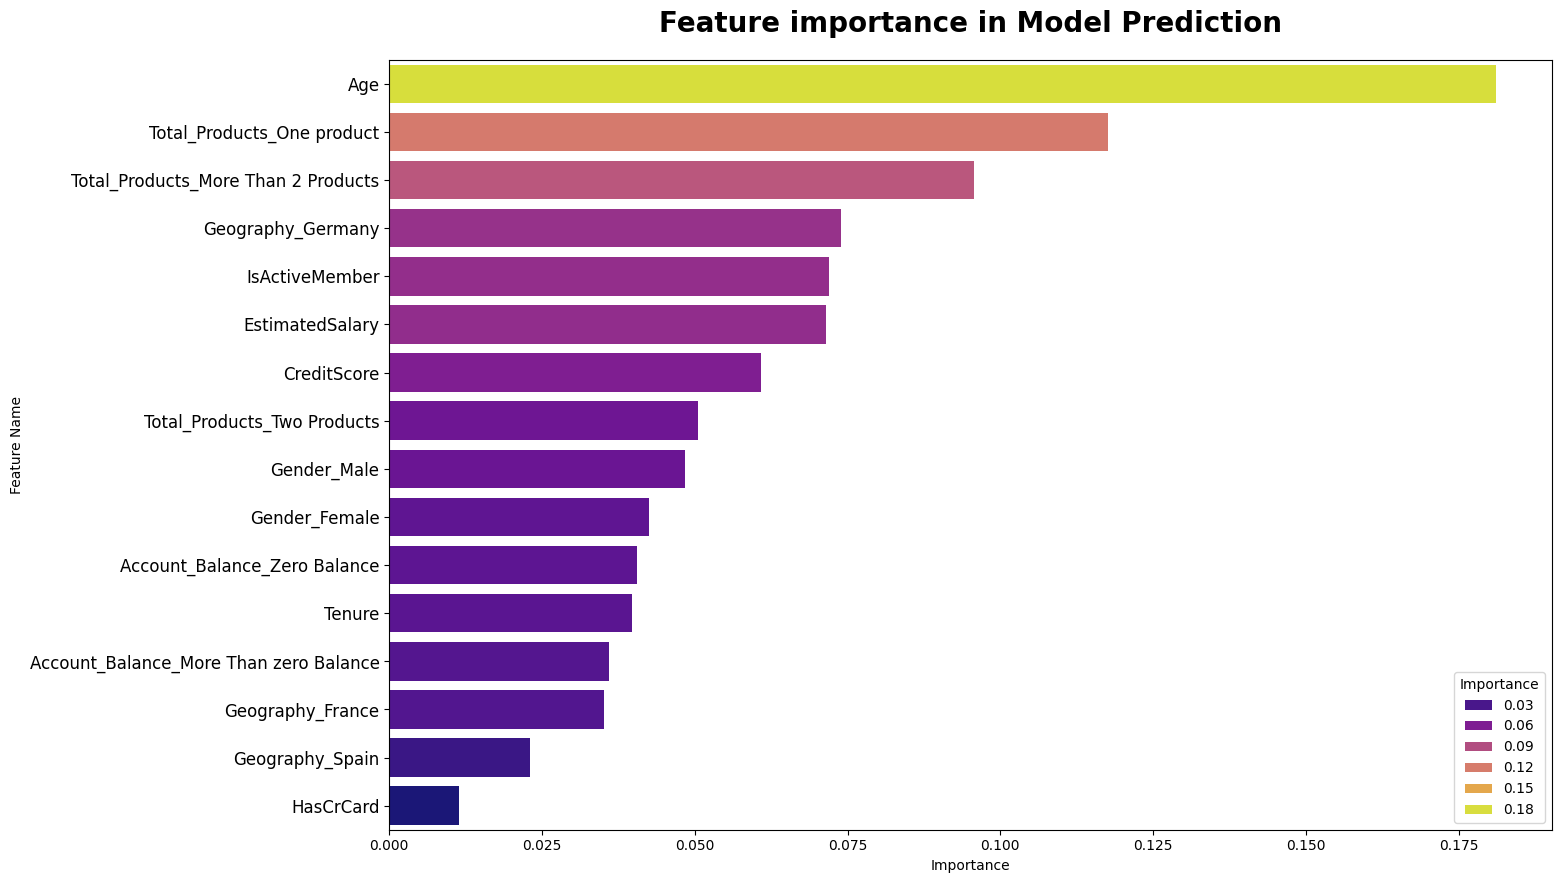

In [62]:
ft = imp_features.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x="Importance", y="Feature Name", data=ft, hue="Importance", palette="plasma")
plt.title("Feature importance in Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

# Factors which significantly influence the customers to churn are

1) AGE

2) Total_Products

3) IsActiveMember

4) Geography

5) Gender

6) Balance



# Final thoughts on the overall model performance

> The model achieved a high accuracy score of above 90% on the training data, indicating a good fit to the training instances.

> The model's accuracy score near to 85% on the testing data suggests its ability to generalize well to unseen instances.

> The model achieved high F1 score, recall, and precision values, all approximately 0.8. This indicates that the model has a strong ability to correctly identify positive cases while minimizing false positives and maximizing true positives.

> The model demonstrates strong performance across multiple evaluation metrics, indicating its effectiveness in making accurate predictions and capturing the desired outcomes.

# Outcomes for the bank to evaluate to reduce Churn

> Bank can try to convince the customers to have atleast 2 banking products but not less than 2.

> Bank can launch a scheme for customers with higher ages so that they not deactivate accounts.